In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pickle
import re
import string
import json
pd.options.mode.chained_assignment = None  # default='warn'
from merge_vegas import open_pickle, save_to_pickle
from import_yelp_mongo import get_yelp_reviews, get_yelp_reviews_afterdate

%matplotlib inline

/Users/tracy/anaconda/lib/python2.7/site-packages/fuzzywuzzy/fuzz.py:33: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
from IPython.display import display

# Read in datasets

In [3]:
WI = open_pickle('../data/mad/madison_yelp_merge.pkl')
NV = open_pickle('../data/vegas/vegas_yelp_merge.pkl')
AZ = open_pickle('../data/phx/phoenix_yelp_merge.pkl')
NC = open_pickle('../data/char/charlotte_yelp_merge.pkl')

In [324]:
print WI.shape
print NV.shape
print AZ.shape
print NC.shape

(654, 54)
(952, 40)
(3984, 43)
(1332, 56)


# Subset Review database

In [14]:
def state_yelp_reviews(df, d, tag):
    ids_ = df.business_id.values.tolist()
    R = get_yelp_reviews_afterdate(ids_, d)
    print R.info()
    
    save_to_pickle(R, '../data/yelp/yelp_reviews_%s.pkl' % tag)
    
    return R

In [15]:
R_WI = state_yelp_reviews(WI, '2011-06-30', 'madison')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18984 entries, 0 to 18983
Data columns (total 9 columns):
_id            18984 non-null object
business_id    18984 non-null object
date           18984 non-null object
review_id      18984 non-null object
stars          18984 non-null int64
text           18984 non-null object
type           18984 non-null object
user_id        18984 non-null object
votes          18984 non-null object
dtypes: int64(1), object(8)
memory usage: 1.4+ MB
None


## Madison, WI

In [401]:
import features_madison as lib

In [402]:
reload(lib)

<module 'features_madison' from 'features_madison.py'>

In [6]:
WI.info()

<class 'pandas.core.frame.DataFrame'>
Index: 654 entries, (43 north, 108, king st, madison, 53703) to (windsor, 53598)
Data columns (total 54 columns):
address                    654 non-null object
addressy_                  654 non-null object
attributes                 654 non-null object
avg                        356 non-null float64
avg_2                      356 non-null float64
avg_3                      356 non-null float64
avg_w                      356 non-null float64
avg_w_2                    356 non-null float64
avg_w_3                    356 non-null float64
business_id                654 non-null object
categories                 654 non-null object
city                       654 non-null object
complex                    654 non-null object
complexy_                  654 non-null object
full_address               654 non-null object
fuzz_partial_ratio         356 non-null float64
fuzz_partial_ratio_2       356 non-null float64
fuzz_partial_ratio_3       356 non-null f

In [17]:
print R_WI.date.min()
print R_WI.date.max()

2011-07-01
2015-01-08


In [385]:
print pd.to_datetime(I_WI.date).min()
print pd.to_datetime(I_WI.date).max()

2012-01-04 00:00:00
2015-10-30 00:00:00


In [404]:
%%time
df_WI = lib.get_features_WI(WI, '2011-06-30', 'madison', ['n_critical', 'n_violations'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18984 entries, 0 to 18983
Data columns (total 9 columns):
_id            18984 non-null object
business_id    18984 non-null object
date           18984 non-null object
review_id      18984 non-null object
stars          18984 non-null int64
text           18984 non-null object
type           18984 non-null object
user_id        18984 non-null object
votes          18984 non-null object
dtypes: int64(1), object(8)
memory usage: 1.4+ MB
None
(94353, 15)
(16775, 15)
CPU times: user 48.2 s, sys: 2.28 s, total: 50.5 s
Wall time: 1min 13s


In [269]:
save_to_pickle(df_WI, '../data/mad/madison_yelp_features.pkl')

# Charlotte, NC

In [354]:
import features_charlotte as lib

In [581]:
reload(lib)

<module 'features_phoenix' from 'features_phoenix.py'>

In [346]:
NC.columns.values

array(['address', 'addressy_', u'attributes', 'avg', 'avg_2', 'avg_3',
       'avg_w', 'avg_w_2', 'avg_w_3', u'business_id', u'categories',
       'city', u'cityy_', 'complex', 'county', u'full_address',
       'fuzz_partial_ratio', 'fuzz_partial_ratio_2',
       'fuzz_partial_ratio_3', 'fuzz_ratio', 'fuzz_ratio_2',
       'fuzz_ratio_3', 'fuzz_token_set_ratio', 'fuzz_token_set_ratio_2',
       'fuzz_token_set_ratio_3', 'fuzz_token_sort_ratio',
       'fuzz_token_sort_ratio_2', 'fuzz_token_sort_ratio_3', u'hours',
       'id_', 'inspections', u'latitude', u'longitude', 'max', 'max_2',
       'max_3', 'name', 'name2_h', 'name2_y', 'name_', 'name_y_',
       u'namey_', u'neighborhoods', 'num', 'numy_', u'open',
       u'review_count', u'stars', 'state', u'statey_', 'street',
       'streety_', 'suite', 'suitey_', 'type', u'typey_'], dtype=object)

In [382]:
I_NC = lib.get_NC_inspections(NC, drop_flag=False)

In [383]:
I_NC.head()

,date,score,grade,inspector,id_,inspec_id
0,3/3/2015,97,A,2219,161416,161416_0
1,12/5/2014,96,A,2219,161416,161416_1
2,9/24/2015,97,A,2427,127669,127669_0
3,5/26/2015,97.50,A,2447,127669,127669_1
4,1/15/2015,97,A,2447,127669,127669_2


In [386]:
print pd.to_datetime(I_NC.date).min()
print pd.to_datetime(I_NC.date).max()

2013-06-24 00:00:00
2015-10-21 00:00:00


In [387]:
R_NC = lib.state_yelp_reviews(NC, '2012-11-30', 'charlotte')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29898 entries, 0 to 29897
Data columns (total 9 columns):
_id            29898 non-null object
business_id    29898 non-null object
date           29898 non-null object
review_id      29898 non-null object
stars          29898 non-null int64
text           29898 non-null object
type           29898 non-null object
user_id        29898 non-null object
votes          29898 non-null object
dtypes: int64(1), object(8)
memory usage: 2.3+ MB
None


In [391]:
y, x = lib.merge_inspec_dates(I_NC, NC, R_NC, ['score','grade'])

(175773, 15)
(130504, 15)


In [399]:
%%time
df_NC = lib.get_features_NC(NC, '2011-06-30', 'charlotte', ['score','grade'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41485 entries, 0 to 41484
Data columns (total 9 columns):
_id            41485 non-null object
business_id    41485 non-null object
date           41485 non-null object
review_id      41485 non-null object
stars          41485 non-null int64
text           41485 non-null object
type           41485 non-null object
user_id        41485 non-null object
votes          41485 non-null object
dtypes: int64(1), object(8)
memory usage: 3.2+ MB
None
(241574, 15)
(196930, 15)
CPU times: user 57.9 s, sys: 2.71 s, total: 1min
Wall time: 1min 23s


In [406]:
save_to_pickle(df_NC, '../data/char/charlotte_yelp_features.pkl')

# Phoenix, AZ

In [4]:
import features_phoenix as lib

In [680]:
reload(lib)

<module 'features_phoenix' from 'features_phoenix.pyc'>

In [5]:
%%time
target_list = ['n_priority', 'grade', 'n_violations','v_core','sum_core',
               'v_foundation','sum_foundation','v_priority','sum_priority']


df_AZ = lib.get_features_AZ(AZ, '2012-04-01', 'phoenix', target_list)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150758 entries, 0 to 150757
Data columns (total 9 columns):
_id            150758 non-null object
business_id    150758 non-null object
date           150758 non-null object
review_id      150758 non-null object
stars          150758 non-null int64
text           150758 non-null object
type           150758 non-null object
user_id        150758 non-null object
votes          150758 non-null object
dtypes: int64(1), object(8)
memory usage: 11.5+ MB
None
(2108930, 22)
(149358, 22)
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 23938 entries, (3312868, Q90fNAiXiTHFoqgCDf63sg, FD-03700) to (3743047, NUkwod-8wWjQ-3ghMoh8bQ, FD-41028)
Data columns (total 6 columns):
rev_ct         23938 non-null int64
neg_ct         23938 non-null int64
stars_avg      23938 non-null float64
rev_len_avg    23938 non-null float64
stars_var      23938 non-null float64
text           23938 non-null object
dtypes: float64(3), int64(2), object(1)
memory usage: 1

In [10]:
df_AZ[df_AZ.text.apply(lambda x: len(x.split())) > 700].text.values

array([ u'The fish tacos are excellent. Light and priced just right. Although we had passed by many times before we attempted to dine at 1103 for the first time last night.  I say attempted because the hour long experience ended with neither my husband or I eating more than four bites of food each.  First, our server was really slow and seemed to vanish into thin air quite often.  So much so that I frequently had to flag down another sever, Roger, to find our server.  I will say that Roger was the only positive about our experience because he was very nice and professional.\n\nWe asked our server how the calamari was to which she replied that the sauce that comes with it was very good because it combined a sweet and spicy taste so we ordered the calamari to start.  However, our server neglected to tell us that calamari is drowned in the sauce rather than the sauce coming on the side to dip which would have been useful information.  In addition the calamari came out fairly cold but we c

In [6]:
save_to_pickle(df_AZ, '../data/phx/phoenix_yelp_features.pkl')

In [516]:
I_AZ = lib.get_AZ_inspections(AZ)

In [557]:
print pd.to_datetime(I_AZ.date).min()
print pd.to_datetime(I_AZ.date).max()

2012-10-23 00:00:00
2015-10-27 00:00:00


In [556]:
I_AZ.head()

,comments,cutting_edge,date,grade,inspec_id,link,n_priority,permit_id,purpose,has_v,id_
2000,This establishment is not participating in the...,,07/30/2015,Not Participating,3755626,/EnvSvc/OnlineApplication/EnvironmentalHealth/...,0,FD-00235,Routine Inspection,True,FD-00235
2001,This establishment is not participating in the...,,04/29/2015,Not Participating,3716286,/EnvSvc/OnlineApplication/EnvironmentalHealth/...,1,FD-00235,Routine Inspection,True,FD-00235
2002,This establishment is not participating in the...,,01/29/2015,Not Participating,3675671,/EnvSvc/OnlineApplication/EnvironmentalHealth/...,1,FD-00235,Routine Inspection,True,FD-00235
2003,This establishment received an B Grade and had...,,10/13/2014,B,3633122,/EnvSvc/OnlineApplication/EnvironmentalHealth/...,NA,FD-00235,Routine Inspection,True,FD-00235
2004,This establishment is not participating in the...,,07/23/2014,Not Participating,3598800,/EnvSvc/OnlineApplication/EnvironmentalHealth/...,NA,FD-00235,Routine Inspection,True,FD-00235


In [590]:
V_AZ, I_AZ = lib.get_AZ_violations(I_AZ)

In [587]:
I_AZ['test'] = lib.v_count(I_AZ, V_AZ, 'n_core')

In [591]:
I_AZ.describe()

,has_v,n_violations,v_core,sum_core,v_foundation,sum_foundation,v_priority,sum_priority,test
count,44502,24926.000000,44502.00000,44502.000000,44502.000000,44502.000000,44502.000000,44502.000000,44502.00000
mean,0.56011,2.436652,0.55811,0.575839,0.349939,0.361062,0.473170,0.479192,0.55811
std,0.496379,1.657970,0.92443,0.972505,0.695587,0.727933,0.821465,0.840352,0.92443
min,False,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,0,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,1,2.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,1,3.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000
max,True,16.000000,10.00000,12.000000,8.000000,8.000000,8.000000,10.000000,10.00000


In [ ]:
temp = pd.Series(0, index=[1,2,3,4,5])
print temp


In [596]:
I_AZ.pivot_table(values='inspec_id',columns='v_priority',index='n_priority', aggfunc='count')

v_priority,0,1,2,3,4,5,6,7,8
n_priority,,,,,,,,,
0,8718,99,22,10,1,NaN,NaN,NaN,NaN
1,2,2723,7,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,17,923,4,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,22,245,1,NaN,NaN,NaN,NaN
4,NaN,NaN,1,13,82,1,NaN,NaN,NaN
5,NaN,NaN,NaN,1,6,20,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,5,4,NaN,NaN
7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
NA,21473,6704,2359,756,199,62,16,4,1


In [500]:
I_AZ.groupby('grade')[['n_priority']].describe().unstack(-1)

n_priority                  
                       count unique top   freq
grade                                         
                       31820      4  NA  21844
A                      63980      5  NA  42494
B                      16874      4  NA  12225
C                       1957      6  NA   1446
D                        529      8  NA    392
Not Participating      56655      9  NA  39485
Re-Inspection            128      4  NA     93
Training                   2      1  NA      2

In [501]:
I_AZ.n_priority.value_counts()

NA    117981
0      43148
1       7762
2       2181
3        623
4        179
5         51
6         18
7          2
Name: n_priority, dtype: int64

# Las Vegas, NV

In [481]:
import features_vegas as lib

In [486]:
reload(lib)

<module 'features_vegas' from 'features_vegas.py'>

In [487]:
%%time
df_NV = lib.get_features_NV(NV, '1989-07-01', 'vegas', ['result','type_id','demerits','grade', 'n_violations'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43606 entries, 0 to 43605
Data columns (total 9 columns):
_id            43606 non-null object
business_id    43606 non-null object
date           43606 non-null object
review_id      43606 non-null object
stars          43606 non-null int64
text           43606 non-null object
type           43606 non-null object
user_id        43606 non-null object
votes          43606 non-null object
dtypes: int64(1), object(8)
memory usage: 3.3+ MB
None
(735767, 18)
(218969, 18)
CPU times: user 16.3 s, sys: 3.26 s, total: 19.6 s
Wall time: 42.6 s


In [488]:
save_to_pickle(df_NV, '../data/vegas/vegas_yelp_features.pkl')

In [479]:
I_NV = lib.get_NV_inspections(NV)

In [459]:
I_NV.describe()

,type_id,demerits,n_viol
count,14209.000000,14209.000000,14209.000000
mean,901.558449,8.297769,3.179041
std,64.559116,12.761000,3.049568
min,604.000000,-1.000000,0.000000
25%,916.000000,2.000000,1.000000
50%,916.000000,6.000000,3.000000
75%,916.000000,9.000000,4.000000
max,929.000000,100.000000,40.000000


1989-07-14 00:00:00
2015-10-21 00:00:00


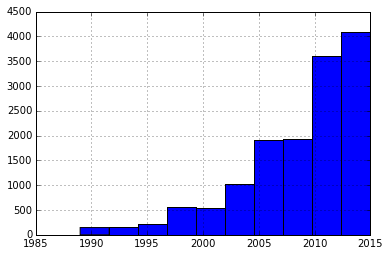

In [467]:
print pd.to_datetime(I_NV.date).min()
print pd.to_datetime(I_NV.date).max()
pd.to_datetime(I_NV.date).apply(lambda x: x.year).hist()

In [470]:
I_NV.pivot_table(values='serial_number',index='result',columns='grade',aggfunc='count')

grade,,A,B,C,N,O,X
result,,,,,,,
Approved,NaN,NaN,NaN,NaN,NaN,475,NaN
Approved - Follow Up: Operations,325,1,NaN,NaN,NaN,19,NaN
Approved - Follow Up: Plan Review,289,NaN,NaN,NaN,NaN,2,NaN
B Downgrade,NaN,NaN,1343,NaN,NaN,NaN,NaN
C Downgrade,NaN,NaN,NaN,562,NaN,NaN,NaN
Closed with Fees,NaN,NaN,NaN,NaN,NaN,NaN,110
Closed without Fees,NaN,NaN,NaN,NaN,NaN,NaN,6
Complaint Invalid/Unsubstantiated,89,258,5,1,NaN,NaN,NaN
Compliance Schedule,NaN,1,NaN,NaN,NaN,NaN,NaN


In [469]:
I_NV.pivot_table(values='serial_number',index='grade',columns='type_id',aggfunc='count')

type_id,604,661,910,914,916,918,928,929
grade,,,,,,,,
,96,322,432,18,114,43,105,433
A,259,NaN,NaN,906,8879,NaN,NaN,36
B,36,NaN,NaN,NaN,1335,NaN,NaN,NaN
C,18,NaN,NaN,28,529,NaN,NaN,NaN
N,NaN,3,1,NaN,NaN,NaN,NaN,3
O,NaN,9,2,2,10,3,14,456
X,4,1,NaN,13,95,1,NaN,3


In [458]:
I_NV.groupby('grade').describe()[['demerits']].unstack(-1).sort_values(('demerits','mean'))

demerits                                             
         count       mean        std min 25% 50%   75%  max
grade                                                      
O          496   3.485887   5.301401   0   1   3   5.0  100
A        10080   5.382837   3.697292  -1   3   6   8.0  100
          1563  11.098528  30.955886  -1  -1   0   0.0  100
B         1371  16.908096   3.277040   0  15  18  19.0   23
C          575  29.674783   7.442250   0  26  30  35.0   55
N            7  30.428571  42.832453   0   0   0  56.5  100
X          117  35.136752  19.946872   0  19  34  50.0  100

In [457]:
I_NV.groupby('grade').describe()[['n_viol']].unstack(-1).sort_values(('n_viol','mean'))

n_viol                                         
       count       mean       std min 25% 50% 75% max
grade                                                
        1563   0.511836  1.249976   0   0   0   0  10
O        496   2.024194  1.854130   0   0   2   3  10
N          7   2.142857  3.760699   0   0   0   3   9
A      10080   2.671429  1.825065   0   1   3   4  40
B       1371   6.485777  2.451347   0   5   7   8  14
C        575  10.634783  4.079631   0   9  11  13  23
X        117  12.111111  7.115764   0   7  12  18  25

In [433]:
I_NV[I_NV.n_viol==1].groupby('violations').describe()\
    [['demerits']].unstack(-1).sort_values(('demerits','count'), ascending=False)

demerits                                            
              count      mean        std min 25% 50%   75%  max
violations                                                     
14             2477  4.022204   0.307275   1   4   4  4.00   10
2930           2380  1.279832  11.161500  -1   0   0  0.00  100
36             2354  1.400595   1.311176  -1   1   1  1.00   10
37             2118  0.999056   0.173869  -1   1   1  1.00    4
31             1903  1.118760   0.760195  -1   1   1  1.00   12
13             1534  3.017601   0.311264   2   3   3  3.00    9
2955           1445  3.337716   5.532277  -1   3   3  3.00   97
27             1372  1.000000   0.000000   1   1   1  1.00    1
35             1290  1.196124   0.920156  -1   1   1  1.00   10
233            1159  7.417601  24.142136  -1   1   1  1.00   99
2928           1156  0.801903   8.798349  -1   0   0  0.00  100
30             1133  1.462489   1.602685  -1   1   1  1.00   10
215            1113  3.544474   6.896332  -1   3   3  3.00   97
28              842  1.059382   0.719220  -1   1   1  1.00   12
4               792  4.003788   0.957365  -1   4   4  4.00   27
211             737  3.436906   6.079782   3   3   3  3.00   97
114             733  3.989086   0.208798   0   4   4  4.00    4
40              676  3.933432   2.157504   1   2   4  6.00   10
230             550  4.052727  16.566446  -1   1   1  1.00   99
212             543  3.882136  10.942188   3   3   3  3.00  200
64              540  5.633333   1.280219   0   6   6  6.00   13
38              518  4.413127   2.636447  -1   1   4  6.00   12
10              516  5.180233   3.467530   2   3   3  7.00   40
214             507  5.783037  15.943709   1   3   3  3.00   97
112             502  4.000000   0.000000   4   4   4  4.00    4
25              488  1.204918   1.077594   1   1   1  1.00   10
8               455  5.712088   2.147267   3   4   6  6.00   20
2909            450  3.011111   0.235702   3   3   3  3.00    8
19              447  1.049217   0.431176   1   1   1  1.00    6
218             374  3.350267   5.073485   3   3   3  3.00   97
...             ...       ...        ...  ..  ..  ..   ...  ...
9                88  2.977273   2.228227   2   2   2  3.25   16
231              88  1.022727   0.149887   1   1   1  1.00    2
21               83  1.096386   0.484251   1   1   1  1.00    4
15               79  6.000000   0.000000   6   6   6  6.00    6
2908             69  3.000000   0.000000   3   3   3  3.00    3
223              67  8.611940  22.439788   3   3   3  3.00   97
226              62  8.903226  26.902197   1   1   1  1.00   99
29               45  2.000000   1.552125   1   1   2  2.00    8
1                35  6.000000   0.000000   6   6   6  6.00    6
7                26  2.000000   0.000000   2   2   2  2.00    2
210              26  5.000000   0.000000   5   5   5  5.00    5
220              24  6.916667  19.187670   3   3   3  3.00   97
205              22  9.090909  19.188064   5   5   5  5.00   95
39               21  5.619048   2.355338   1   4   6  6.00   10
17               21  2.142857   0.478091   2   2   2  2.00    4
201              21  9.333333  19.629909   5   5   5  5.00   95
203              20  5.150000   0.670820   5   5   5  5.00    8
2907             18  8.222222  22.156012   3   3   3  3.00   97
61               18  6.000000   0.000000   6   6   6  6.00    6
2925             17  0.000000   0.000000   0   0   0  0.00    0
207              14  5.000000   0.000000   5   5   5  5.00    5
26               14  3.000000   0.000000   3   3   3  3.00    3
234              12  1.000000   0.000000   1   1   1  1.00    1
224               9  1.333333   1.000000   1   1   1  1.00    4
221               8  3.000000   0.000000   3   3   3  3.00    3
3                 5  2.800000   1.303840   2   2   2  3.00    5
302               4  0.000000   0.000000   0   0   0  0.00    0
62                2  6.000000   0.000000   6   6   6  6.00    6
219               2  3.000000   0.000000   

# Model, Create X, y:

In [285]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import f1_score

In [278]:
df_train, df_test = train_test_split(df_WI)

X_train = df_train[['rev_ct','neg_ct','stars_avg','rev_len_avg','stars_var']].values
y_train = df_train[['n_violations','n_critical']].values
X_test = df_test[['rev_ct','neg_ct','stars_avg','rev_len_avg','stars_var']].values
y_test = df_test[['n_violations','n_critical']].values

In [276]:
model_ols = LinearRegression()
model_ols.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [297]:
model_ols_sm = sm.OLS(y_train[:,1], sm.add_constant(X_train[:,[2,3,4]]) )
res = model_ols_sm.fit()
print res.summary()

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.011
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     5.739
Date:                Wed, 11 Nov 2015   Prob (F-statistic):           0.000667
Time:                        13:10:02   Log-Likelihood:                -3164.3
No. Observations:                1485   AIC:                             6337.
Df Residuals:                    1481   BIC:                             6358.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          1.8800      0.248      7.585      0.0

In [283]:
df_train.describe()

,n_violations,n_critical,rev_ct,neg_ct,stars_avg,rev_len_avg,stars_var
count,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000,1485.000000
mean,4.282155,2.220202,8.716498,8.716498,3.502187,597.791884,1.111015
std,3.546835,2.050408,12.690321,12.690321,0.939607,328.411301,1.203548
min,0.000000,0.000000,1.000000,1.000000,1.000000,36.000000,0.000000
25%,2.000000,1.000000,2.000000,2.000000,3.000000,391.000000,0.000000
50%,4.000000,2.000000,4.000000,4.000000,3.666667,564.750000,0.894737
75%,6.000000,3.000000,10.000000,10.000000,4.100000,740.812500,1.655556
max,22.000000,13.000000,134.000000,134.000000,5.000000,4236.000000,8.000000


In [284]:
df_test.describe()

,n_violations,n_critical,rev_ct,neg_ct,stars_avg,rev_len_avg,stars_var
count,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000,495.000000
mean,4.454545,2.430303,7.739394,7.739394,3.491642,631.490225,1.044846
std,4.076378,2.432633,9.661412,9.661412,0.949514,384.902831,1.123696
min,0.000000,0.000000,1.000000,1.000000,1.000000,38.000000,0.000000
25%,2.000000,1.000000,2.000000,2.000000,3.000000,390.250000,0.000000
50%,3.000000,2.000000,4.000000,4.000000,3.666667,575.250000,0.787879
75%,6.000000,4.000000,10.000000,10.000000,4.088008,784.083333,1.600000
max,37.000000,17.000000,65.000000,65.000000,5.000000,4242.000000,8.000000


In [344]:
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train[:,1])
y_pred = model_rf.predict(X_test)
#f1_score(y_test[:,1]+0.001, y_pred+0.001)

In [298]:
I_WI.describe()

,n_violations,n_critical
count,2831.000000,2831.000000
mean,4.467326,2.374779
std,3.862419,2.280301
min,0.000000,0.000000
25%,1.000000,1.000000
50%,4.000000,2.000000
75%,6.000000,4.000000
max,37.000000,17.000000


In [313]:
temp = I_WI.copy()
temp['n_core'] = - temp.n_critical + temp.n_violations
temp['grade'] = 0
temp.loc[temp.n_critical>= 1,'grade'] +=1
temp.loc[temp.n_critical>= 2,'grade'] +=1
temp.loc[temp.n_critical>= 3,'grade'] +=1
temp.loc[temp.n_core>=4,'grade'] +=1
temp['target'] = temp.grade >= 3

In [322]:
temp.groupby('id_').max().describe()

,n_violations,n_critical,n_core,grade,target
count,636.000000,636.000000,636.000000,636.000000,636
mean,7.127358,3.753145,4.061321,2.886792,0.718553
std,4.149696,2.361850,2.710902,1.064716,0.450059
min,0.000000,0.000000,0.000000,0.000000,False
25%,4.000000,2.000000,2.000000,2.000000,0
50%,6.000000,3.000000,4.000000,3.000000,1
75%,9.000000,5.000000,6.000000,4.000000,1
max,37.000000,17.000000,20.000000,4.000000,True


# Charlotte, NC -- Classification:

In [605]:
df_NC = open_pickle('../data/char/charlotte_yelp_features.pkl')

In [278]:
df_train, df_test = train_test_split(df_NC)
target_list = []

X_train = df_train[['rev_ct','neg_ct','stars_avg','rev_len_avg','stars_var']].values
y_train = df_train[['n_violations','n_critical']].values
X_test = df_test[['rev_ct','neg_ct','stars_avg','rev_len_avg','stars_var']].values
y_test = df_test[['n_violations','n_critical']].values

In [606]:
df_NC.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284 entries, 0 to 6742
Data columns (total 12 columns):
business_id    284 non-null object
id_            284 non-null int64
date           284 non-null object
inspec_id      284 non-null object
score          284 non-null object
grade          284 non-null object
date_start     284 non-null datetime64[ns]
rev_ct         284 non-null int64
neg_ct         284 non-null int64
stars_avg      284 non-null float64
rev_len_avg    284 non-null float64
stars_var      284 non-null float64
dtypes: datetime64[ns](1), float64(3), int64(3), object(5)
memory usage: 28.8+ KB


# Phoenix, AZ -- Classification:

In [33]:
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC, LinearSVR
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score,\
                            confusion_matrix, classification_report, mean_squared_error

In [102]:
import features_phoenix as lib_features

In [104]:
reload(lib_features)

<module 'features_phoenix' from 'features_phoenix.py'>

In [80]:
df_AZ = open_pickle('../data/phx/phoenix_yelp_features.pkl')

In [105]:
df_AZ_routine = lib_features.get_features_AZ(AZ, '2012-04-01', 'phoenix', 
                                ['n_priority', 'grade', 'purpose','n_violations',
                                 'v_core','sum_core','v_foundation','sum_foundation',
                                 'v_priority','sum_priority'],
                                routine=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150758 entries, 0 to 150757
Data columns (total 9 columns):
_id            150758 non-null object
business_id    150758 non-null object
date           150758 non-null object
review_id      150758 non-null object
stars          150758 non-null int64
text           150758 non-null object
type           150758 non-null object
user_id        150758 non-null object
votes          150758 non-null object
dtypes: int64(1), object(8)
memory usage: 11.5+ MB
None
(1584295, 23)
(147591, 23)
<class 'pandas.core.frame.DataFrame'>
MultiIndex: 21431 entries, (3312868, Q90fNAiXiTHFoqgCDf63sg, FD-03700) to (3789376, h8vo2cBL9mE7Ar0qc0oD0A, FD-35413)
Data columns (total 6 columns):
rev_ct         21431 non-null int64
neg_ct         21431 non-null int64
stars_avg      21431 non-null float64
rev_len_avg    21431 non-null float64
stars_var      21431 non-null float64
text           21431 non-null object
dtypes: float64(3), int64(2), object(1)
memory usage: 1

In [81]:
df_AZ.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23938 entries, 2 to 45192
Data columns (total 21 columns):
business_id       23938 non-null object
id_               23938 non-null object
date              23938 non-null object
inspec_id         23938 non-null object
n_priority        23938 non-null object
grade             23938 non-null object
purpose           23938 non-null object
n_violations      15262 non-null float64
v_core            23938 non-null int64
sum_core          23938 non-null int64
v_foundation      23938 non-null int64
sum_foundation    23938 non-null int64
v_priority        23938 non-null int64
sum_priority      23938 non-null int64
date_start        23938 non-null datetime64[ns]
rev_ct            23938 non-null int64
neg_ct            23938 non-null int64
stars_avg         23938 non-null float64
rev_len_avg       23938 non-null float64
stars_var         23938 non-null float64
text              23938 non-null object
dtypes: datetime64[ns](1), float64(4), int64(8)

In [20]:
def create_target(df, col, t):
    target = (df[col] >= t).astype(int)
    return target.values

def create_model_inputs(df, col, t):
    X = df[['rev_ct','neg_ct','stars_avg','rev_len_avg','stars_var']].values
    y = create_target(df, 'sum_priority', t)
    return X, y

def print_metrics(y_true, y_pred):
    print '%.4f   : Accuracy' % accuracy_score(y_true, y_pred)
    print '%.4f   : Precision' % precision_score(y_true, y_pred)
    print '%.4f   : Recall' % recall_score(y_true, y_pred)
    print '%.4f   : f1_score' % f1_score(y_true, y_pred)
    print '%.4f   : MSE' % mean_squared_error(y_true, y_pred)
    print '%s   : Confusion matrix' % confusion_matrix(y_true, y_pred)
    
def save_metrics(y_true, y_pred):
    d = {'accuracy': accuracy_score(y_true, y_pred),
         'precision': precision_score(y_true, y_pred), 
         'recall': recall_score(y_true, y_pred),
         'f1': f1_score(y_true, y_pred),
         'mse': mean_squared_error(y_true, y_pred)}
    CM = confusion_matrix(y_true, y_pred)
    d.update({'TN': CM[0,0],
              'FP': CM[0,1],
              'FN': CM[1,0],
              'TP': CM[1,1],
             })
    return d

def train_rf(df_train, df_test, col, t, tfs=None):
    X_train, y_train = create_model_inputs(df_train, col, t)
    X_test, y_test = create_model_inputs(df_test, col, t)
    if tfs is not None:
        X_train = tfs[0]
        X_test = tfs[1]
    model_rf = RandomForestClassifier(oob_score=True,
                                      random_state = 981, 
                                      class_weight='balanced')
    model_rf.fit(X_train, y_train)
    y_pred = model_rf.predict(X_test)
    d = save_metrics(y_test, y_pred)
    d.update({'oob':model_rf.oob_score_})
    return {t: d}

def rf_model(df_train, df_test, col, val_range, tfs=None):
    d = {}
    for t in val_range:
        d.update(train_rf(df_train, df_test, col, t, tfs))
    return pd.DataFrame.from_records(d).T

def train_log(df_train, df_test, col, t, tfs = None):
    X_train, y_train = create_model_inputs(df_train, col, t)
    X_test, y_test = create_model_inputs(df_test, col, t)
    if tfs is not None:
        X_train = tfs[0]
        X_test = tfs[1]
    model_log = LogisticRegression()
    model_log.fit(X_train, y_train)
    y_pred = model_log.predict(X_test)
    d = save_metrics(y_test, y_pred)
    return {t: d}

def log_model(df_train, df_test, col, val_range, tfs=None):
    d = {}
    for t in val_range:
        d.update(train_log(df_train, df_test, col, t, tfs))
    return pd.DataFrame.from_records(d).T

def train_svc(df_train, df_test, col, t, tfs=None, multiclass=False):
    X_train, y_train = create_model_inputs(df_train, col, t)
    X_test, y_test = create_model_inputs(df_test, col, t)
    if tfs is not None:
        X_train = tfs[0]
        X_test = tfs[1]
    if multiclass:
        y_train = df_train[col].values
        y_test = df_test[col].values
    model_svc = LinearSVC(C=0.19, random_state = 981, class_weight='balanced')
    model_svc.fit(X_train, y_train)
    y_pred = model_svc.predict(X_test)
    d = save_metrics(y_test, y_pred)
    return {t: d}

def svc_model(df_train, df_test, col, val_range, tfs=None, multiclass=False):
    d = {}
    for t in val_range:
        d.update(train_svc(df_train, df_test, col, t, tfs, multiclass))
    return pd.DataFrame.from_records(d).T

In [9]:
df_train, df_test = train_test_split(df_AZ, train_size=0.6, random_state = 981)

# target_list = ['n_priority', 'grade', 'n_violations','v_core','sum_core',
#                'v_foundation','sum_foundation','v_priority','sum_priority']

# X_train, y_train = create_model_inputs(df_train, 'sum_priority', 2)
# X_test, y_test = create_model_inputs(df_test, 'sum_priority', 2)

In [10]:
print df_train.shape
print df_test.shape

(14362, 20)
(9576, 20)


In [625]:
model_rf = RandomForestClassifier(oob_score=True)
model_rf.fit(X_train, y_train)
y_pred = model_rf.predict(X_test)
print '%.4f   : OOB Score' % model_rf.oob_score
print_metrics(y_test, y_pred)

1.0000   : OOB Score
0.8351   : Accuracy
0.1238   : Precision
0.0462   : Recall
0.0673   : f1_score
[[15879   807]
 [ 2351   114]]   : Accuracy


In [628]:
save_metrics(y_test, y_pred, 2)

{2: {'FN': 2351,
  'FP': 807,
  'TN': 15879,
  'TP': 114,
  'accuracy': 0.83509999477834052,
  'f1': 0.067336089781453043,
  'precision': 0.12377850162866449,
  'recall': 0.046247464503042596}}

In [648]:
train_rf(df_train, df_test, 'sum_priority', 2)

{2: {'FN': 1220,
  'FP': 467,
  'TN': 7816,
  'TP': 73,
  'accuracy': 0.82383040935672514,
  'f1': 0.079650845608292414,
  'oob': 0.82216961425985235,
  'precision': 0.13518518518518519,
  'recall': 0.056457849961330242}}

In [652]:
rf_model(df_train, df_test, 'sum_priority', xrange(1, 7))

,FN,FP,TN,TP,accuracy,f1,oob,precision,recall
1,2429,1730,4314,1103,0.565685,0.346583,0.561482,0.38934,0.312288
2,1215,439,7844,78,0.827277,0.086188,0.824815,0.15087,0.060325
3,398,93,9080,5,0.948726,0.019960,0.945620,0.05102,0.012407
4,127,18,9429,2,0.984858,0.026846,0.983637,0.10000,0.015504
5,42,4,9530,0,0.995196,0.000000,0.995753,0.00000,0.000000
6,15,1,9560,0,0.998329,0.000000,0.998747,0.00000,0.000000


In [15]:
cols = ['sum_priority']

for col in cols:
    temp = rf_model(df_train, df_test, col, xrange(1,7))
    temp.index.name=col
    display(temp)

,FN,FP,TN,TP,accuracy,f1,mse,oob,precision,recall
sum_priority,,,,,,,,,,
1,2376,1793,4231,1176,0.564641,0.360681,0.435359,0.560089,0.396093,0.331081
2,1184,624,7681,87,0.811195,0.087790,0.188805,0.817087,0.122363,0.068450
3,395,151,9023,7,0.942982,0.025000,0.057018,0.942348,0.044304,0.017413
4,125,34,9416,1,0.983396,0.012422,0.016604,0.983289,0.028571,0.007937
5,36,4,9536,0,0.995823,0.000000,0.004177,0.995474,0.000000,0.000000
6,15,0,9561,0,0.998434,0.000000,0.001566,0.998538,0.000000,0.000000


In [17]:
cols = ['sum_priority']

for col in cols:
    temp = log_model(df_train, df_test, col, xrange(1,7))
    temp.index.name=col
    display(temp)

,FN,FP,TN,TP,accuracy,f1,mse,precision,recall
sum_priority,,,,,,,,,
1,3516,50,5974,36,0.627611,0.019791,0.372389,0.418605,0.010135
2,1271,0,8305,0,0.867272,0.000000,0.132728,0.000000,0.000000
3,402,0,9174,0,0.958020,0.000000,0.041980,0.000000,0.000000
4,126,0,9450,0,0.986842,0.000000,0.013158,0.000000,0.000000
5,36,0,9540,0,0.996241,0.000000,0.003759,0.000000,0.000000
6,15,0,9561,0,0.998434,0.000000,0.001566,0.000000,0.000000


In [18]:
cols = ['sum_priority']

for col in cols:
    temp = svc_model(df_train, df_test, col, xrange(1,7))
    temp.index.name=col
    display(temp)

,FN,FP,TN,TP,accuracy,f1,mse,precision,recall
sum_priority,,,,,,,,,
1,146,5715,309,3406,0.387949,0.537521,0.612051,0.373424,0.958896
2,1271,0,8305,0,0.867272,0.000000,0.132728,0.000000,0.000000
3,402,0,9174,0,0.958020,0.000000,0.041980,0.000000,0.000000
4,126,0,9450,0,0.986842,0.000000,0.013158,0.000000,0.000000
5,36,0,9540,0,0.996241,0.000000,0.003759,0.000000,0.000000
6,14,192,9369,1,0.978488,0.009615,0.021512,0.005181,0.066667


In [11]:
import yelp_tfidf as lib_tfidf

In [30]:
reload(lib_tfidf)

<module 'yelp_tfidf' from 'yelp_tfidf.py'>

In [12]:
%%time
tfs, tfidf = lib_tfidf.yelp_tfidf(df_AZ)

CPU times: user 10min 12s, sys: 12.4 s, total: 10min 24s
Wall time: 10min 58s


In [109]:
%%time
tfs_r, tfidf_r = lib_tfidf.yelp_tfidf(df_AZ_routine)

CPU times: user 8min 56s, sys: 10.5 s, total: 9min 7s
Wall time: 9min 15s


In [82]:
df_train, df_test, tfs_train, tfs_test = train_test_split(df_AZ, tfs, train_size=0.6, random_state=981)

In [14]:
cols = ['sum_priority']

for col in cols:
    temp = rf_model(df_train, df_test, col, xrange(1,7), [tfs_train.todense(), tfs_test.todense()])
    temp.index.name=col
    display(temp)

/Users/tracy/anaconda/lib/python2.7/site-packages/sklearn/ensemble/forest.py:403: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
/Users/tracy/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/tracy/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


,FN,FP,TN,TP,accuracy,f1,mse,oob,precision,recall
sum_priority,,,,,,,,,,
1,2879,817,5207,673,0.614035,0.266958,0.385965,0.586478,0.451678,0.189471
2,1252,36,8269,19,0.865497,0.028658,0.134503,0.852458,0.345455,0.014949
3,400,10,9164,2,0.957185,0.009662,0.042815,0.954533,0.166667,0.004975
4,125,3,9447,1,0.986633,0.015385,0.013367,0.986423,0.250000,0.007937
5,36,0,9540,0,0.996241,0.000000,0.003759,0.996031,0.000000,0.000000
6,15,0,9561,0,0.998434,0.000000,0.001566,0.998886,0.000000,0.000000


In [19]:
cols = ['sum_priority']

for col in cols:
    temp = svc_model(df_train, df_test, col, xrange(1,7), [tfs_train.todense(), tfs_test.todense()])
    temp.index.name=col
    display(temp)

,FN,FP,TN,TP,accuracy,f1,mse,precision,recall
sum_priority,,,,,,,,,
1,1688,2404,3620,1864,0.572682,0.476726,0.427318,0.436739,0.524775
2,764,2173,6132,507,0.693296,0.256644,0.306704,0.189179,0.398899
3,299,1186,7988,103,0.844925,0.121821,0.155075,0.079907,0.256219
4,106,317,9133,20,0.955827,0.086393,0.044173,0.059347,0.158730
5,31,45,9495,5,0.992063,0.116279,0.007937,0.100000,0.138889
6,13,10,9551,2,0.997598,0.148148,0.002402,0.166667,0.133333


In [21]:
cols = ['sum_priority']

temp = svc_model(df_train, df_test, col, [1], [tfs_train.todense(), tfs_test.todense()], True)
temp.index.name=col
display(temp)

/Users/tracy/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1203: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or multilabel data or pos_label=None will result in an exception. Please set an explicit value for `average`, one of (None, 'micro', 'macro', 'weighted', 'samples'). In cross validation use, for instance, scoring="f1_weighted" instead of scoring="f1".
  sample_weight=sample_weight)
/Users/tracy/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/Users/tracy/anaconda/lib/python2.7/site-packages/sklearn/metrics/classification.py:1304: DeprecationWarning: The default `weighted` averaging is deprecated, and from version 0.18, use of precision, recall or F-score with multiclass or mult

,FN,FP,TN,TP,accuracy,f1,mse,precision,recall
sum_priority,,,,,,,,,
1,1519,617,4449,308,0.511174,0.49773,1.930556,0.49993,0.511174


In [22]:
1688+2404+3620+1864

9576

In [23]:
1519+617+4449+308

6893

In [25]:
col = 'sum_priority'
X_train = tfs_train.todense()
X_test = tfs_test.todense()
y_train = df_train[col].values
y_test = df_test[col].values
model_svc = LinearSVC(C=0.19, random_state = 981, class_weight='balanced')
model_svc.fit(X_train, y_train)
y_pred = model_svc.predict(X_test)
print confusion_matrix(y_test, y_pred)

[[4449  617  373  364  177   42    1    1    0    0]
 [1519  308  171  180   83   17    3    0    0    0]
 [ 503  123   98   88   47   10    0    0    0    0]
 [ 150   43   26   30   18    9    0    0    0    0]
 [  41   15   11   12    8    2    0    1    0    0]
 [   8    2    4    1    3    2    0    0    0    1]
 [   4    1    1    1    3    0    0    0    0    0]
 [   2    0    0    1    0    0    0    0    0    0]
 [   0    0    0    2    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0    0    0]]


In [45]:
# col = ['sum_core','sum_foundation','sum_priority']
# X_train = tfs_train.todense()
# X_test = tfs_test.todense()
# y_train = df_train[col].sum(axis=1).values
# y_test = df_test[col].sum(axis=1).values
# model_svr = LinearSVR(C=0.19, random_state = 981)
# model_svr.fit(X_train, y_train)
# y_pred = model_svr.predict(X_test)
print confusion_matrix(y_test, np.round(y_pred))[:,:5]

[[ 249 2873  369    2    0]
 [ 104 1604  255    1    0]
 [  83 1273  257    7    0]
 [  20  794  223    3    0]
 [  15  470  164    6    0]
 [   2  265  102    3    0]
 [   2  134   42    1    0]
 [   3   65   43    0    0]
 [   1   42   20    2    0]
 [   0   18   18    0    0]
 [   1   10    6    0    0]
 [   0    7    3    2    0]
 [   0    2    3    0    0]
 [   0    1    0    0    0]
 [   0    0    2    0    0]
 [   0    0    0    1    0]
 [   0    0    3    0    0]]


In [46]:
np.unique(np.round(y_pred))

array([ 0.,  1.,  2.,  3.])

In [47]:
np.unique(y_test)

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16])

(array([   73.,   435.,  1820.,  3321.,  2448.,  1035.,   306.,   112.,
           21.,     5.]),
 array([-0.15366649,  0.17918584,  0.51203816,  0.84489049,  1.17774282,
         1.51059514,  1.84344747,  2.1762998 ,  2.50915213,  2.84200445,
         3.17485678]),
 <a list of 10 Patch objects>)

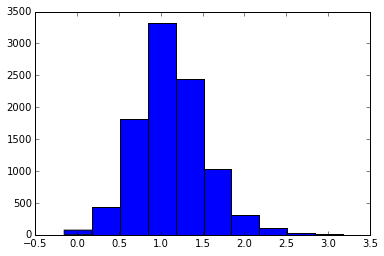

In [37]:
plt.hist(y_pred)

(array([  5.45700000e+03,   2.66000000e+03,   6.55000000e+02,
          5.51000000e+02,   1.11000000e+02,   1.01000000e+02,
          2.90000000e+01,   5.00000000e+00,   3.00000000e+00,
          4.00000000e+00]),
 array([  0. ,   1.6,   3.2,   4.8,   6.4,   8. ,   9.6,  11.2,  12.8,
         14.4,  16. ]),
 <a list of 10 Patch objects>)

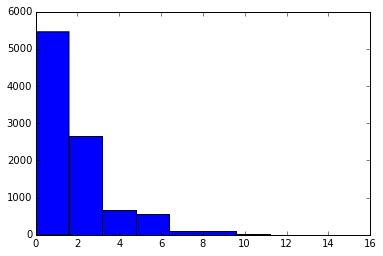

In [40]:
plt.hist(y_test)

In [48]:
df_train.grade.value_counts()

Not Participating    6160
A                    4542
B                    1899
                     1433
C                     244
D                      79
Re-Inspection           5
Name: grade, dtype: int64

In [49]:
4542+1899+244+79

6764

In [54]:
df_train.pivot_table(index='grade',columns='sum_priority', aggfunc='count', values='id_')

sum_priority,0,1,2,3,4,5,6,7,10
grade,,,,,,,,,
,1409,21,3,NaN,NaN,NaN,NaN,NaN,NaN
A,4500,38,4,NaN,NaN,NaN,NaN,NaN,NaN
B,539,1325,35,NaN,NaN,NaN,NaN,NaN,NaN
C,10,33,196,5,NaN,NaN,NaN,NaN,NaN
D,5,5,7,42,15,3,2,NaN,NaN
Not Participating,2606,2053,989,354,109,35,9,3,2
Re-Inspection,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [60]:
df_train.pivot_table(index='n_priority',columns='sum_priority', aggfunc='count', values='id_')

sum_priority,0,1,2,3,4,5,6,7,10
n_priority,,,,,,,,,
0,1118,47,10,3,1,NaN,NaN,NaN,NaN
1,NaN,354,1,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,124,1,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,31,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,10,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN
6,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN
NA,7954,3076,1099,366,113,34,10,3,2


In [58]:
df_train.pivot_table(index=['n_priority','sum_priority'],columns='grade', aggfunc='count', values='id_')

grade                             A     B    C   D  Not Participating  \
n_priority sum_priority                                                 
0          0               82   648    63  NaN NaN                325   
           1              NaN   NaN    15  NaN NaN                 32   
           2              NaN     1   NaN    2 NaN                  7   
           3              NaN   NaN   NaN  NaN NaN                  3   
           4              NaN   NaN   NaN  NaN NaN                  1   
1          1              NaN     5   120    3 NaN                226   
           2              NaN   NaN   NaN  NaN NaN                  1   
2          2              NaN   NaN     1   16 NaN                107   
           3              NaN   NaN   NaN  NaN NaN                  1   
3          3              NaN   NaN   NaN    1   3                 27   
4          4              NaN   NaN   NaN  NaN   1                  9   
5          5              NaN   NaN   NaN  NaN   1                  3   
6          6              NaN   NaN   NaN  NaN NaN                  1   
NA         0             1327  3852   476   10   5               2281   
           1               21    33  1190   30   5               1795   
           2                3     3    34  178   7                874   
           3              NaN   NaN   NaN    4  39                323   
           4              NaN   NaN   NaN  NaN  14                 99   
           5              NaN   NaN   NaN  NaN   2                 32   
           6              NaN   NaN   NaN  NaN   2                  8   
           7              NaN   NaN   NaN  NaN NaN                  3   
           10             NaN   NaN   NaN  NaN NaN                  2   

grade                    Re-Inspection  
n_priority sum_priority                 
0          0                       NaN  
           1                       NaN  
           2                       NaN  
           3                       NaN  
           4                       NaN  
1          1                       NaN  
           2                       NaN  
2          2                       NaN  
           3                       NaN  
3          3                       NaN  
4          4                       NaN  
5          5                       NaN  
6          6                       NaN  
NA         0                         3  
           1                         2  
           2                       NaN  
           3                       NaN  
           4                       NaN  
           5                       NaN  
           6                       NaN  
           7                       NaN  
           10                      NaN

In [61]:
df_train.columns

Index([   u'business_id',            u'id_',           u'date',
            u'inspec_id',     u'n_priority',          u'grade',
         u'n_violations',         u'v_core',       u'sum_core',
         u'v_foundation', u'sum_foundation',     u'v_priority',
         u'sum_priority',     u'date_start',         u'rev_ct',
               u'neg_ct',      u'stars_avg',    u'rev_len_avg',
            u'stars_var',           u'text'],
      dtype='object')

In [68]:
df_train.pivot_table(index='n_priority',columns=pd.to_datetime(df_train.date).apply(lambda x: x.year), aggfunc='count', values='id_')


date,2012,2013,2014,2015
n_priority,,,,
0,NaN,NaN,NaN,1179
1,NaN,NaN,NaN,355
2,NaN,NaN,NaN,125
3,NaN,NaN,NaN,31
4,NaN,NaN,NaN,10
5,NaN,NaN,NaN,4
6,NaN,NaN,NaN,1
NA,1001,5120,6530,6


In [83]:
df_train.pivot_table(index='grade',columns=pd.to_datetime(df_train.date).apply(lambda x: x.year), aggfunc='count', values='id_')



date,2012,2013,2014,2015
grade,,,,
,81,567,700,85
A,338,1488,2061,655
B,172,744,784,199
C,18,101,103,22
D,6,40,28,5
Not Participating,386,2179,2850,745
Re-Inspection,NaN,1,4,NaN


In [73]:
df_AZ.columns

Index([   u'business_id',            u'id_',           u'date',
            u'inspec_id',     u'n_priority',          u'grade',
         u'n_violations',         u'v_core',       u'sum_core',
         u'v_foundation', u'sum_foundation',     u'v_priority',
         u'sum_priority',     u'date_start',         u'rev_ct',
               u'neg_ct',      u'stars_avg',    u'rev_len_avg',
            u'stars_var',           u'text'],
      dtype='object')

In [74]:
I = open_pickle('../data/phx/phoenix_I_full.pkl')

In [76]:
I.pivot_table(index='grade',columns=pd.to_datetime(I.date).apply(lambda x: x.year), aggfunc='count', values='date')



date,2012,2013,2014,2015
grade,,,,
,1452,9177,11194,9997
A,3759,17527,21181,21513
B,1120,5651,5449,4654
C,123,712,611,511
D,37,215,140,137
Not Participating,3465,17246,18740,17204
Re-Inspection,6,43,44,35
Training,NaN,1,1,NaN


In [85]:
df_train.pivot_table(index='purpose',columns='sum_priority', aggfunc='count', values='date')



sum_priority,0,1,2,3,4,5,6,7,10
purpose,,,,,,,,,
Advisory,325,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Close Out,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Complaint Inspection,168,117,48,14,9,2,1,2,NaN
Complaint Response,140,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Construction,22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ERI EPI Investigation,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ERI FBI Investigation,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Equipment,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Final Construction,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [96]:
df_train['insp_len'] = (pd.to_datetime(df_train.date) - df_train.date_start).apply(lambda x: x/np.timedelta64(1, 'D'))

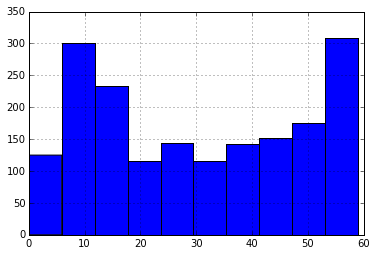

In [100]:
df_train.query('insp_len <60')['insp_len'].hist()

In [101]:
df_train.query('insp_len <60').pivot_table(index='purpose',columns='sum_priority', aggfunc='count', values='date')

sum_priority,0,1,2,3,4,5,6,7
purpose,,,,,,,,
Advisory,245,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Complaint Inspection,42,31,16,3,3,1,NaN,2
Complaint Response,98,2,NaN,NaN,NaN,NaN,NaN,NaN
Construction,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ERI EPI Investigation,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
ERI FBI Investigation,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Equipment,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Final Construction,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Immediate Suspension,4,1,NaN,NaN,NaN,NaN,NaN,NaN


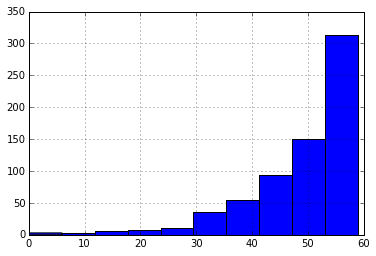

In [108]:
df_AZ_routine['insp_len'] = (pd.to_datetime(df_AZ_routine.date) - df_AZ_routine.date_start)\
                        .apply(lambda x: x/np.timedelta64(1, 'D'))
df_AZ_routine.query('insp_len <60')['insp_len'].hist()
#df_AZ_routine['insp_len'].hist()

In [1]:
vocabulary = ['A','B','C','D','E','F','G','H','I','J','K','L','M','N','O','P','Q','R','S','T','U','V','W','X','Y','Z']
A = ['E','P','V','Z']

In [7]:
%%time 
[i for i, w in enumerate(vocabulary) if w in A]

CPU times: user 32 µs, sys: 21 µs, total: 53 µs
Wall time: 58.9 µs


[4, 15, 21, 25]

In [8]:
%%time 
[vocabulary.index(w) for w in A]

CPU times: user 17 µs, sys: 1 µs, total: 18 µs
Wall time: 22.9 µs


[4, 15, 21, 25]

In [9]:
import numpy as np

In [14]:
test = np.arange(25).reshape((5,5))
print test
print test.sum(axis=0)
print test.sum(axis=1)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]]
[50 55 60 65 70]
[ 10  35  60  85 110]


In [16]:
np.max(test, axis=1)

array([ 4,  9, 14, 19, 24])

In [17]:
import yelp_tfidf as lib_tf

In [28]:
tf = np.random.choice([0,1],(1000,50000))
a = np.random.choice([0,1],(1000,7))

In [30]:
%%time
x = lib_tf.chi_square(tf, a)

CPU times: user 59.9 s, sys: 1.17 s, total: 1min 1s
Wall time: 1min 8s


In [29]:
%%time
x2 = lib_tf.chi_square2(tf, a)

CPU times: user 19 s, sys: 1.51 s, total: 20.5 s
Wall time: 21.7 s


In [31]:
68/21

3

In [32]:
tf.T.dot(a)

array([[267, 246, 230, ..., 234, 251, 250],
       [262, 246, 226, ..., 243, 256, 259],
       [269, 239, 214, ..., 257, 246, 248],
       ..., 
       [272, 243, 224, ..., 259, 267, 276],
       [268, 242, 232, ..., 231, 245, 250],
       [289, 253, 233, ..., 252, 270, 256]])